<a href="https://colab.research.google.com/github/Anjasfedo/Code-as-a-Cryptography/blob/main/lsb_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gambar asli:


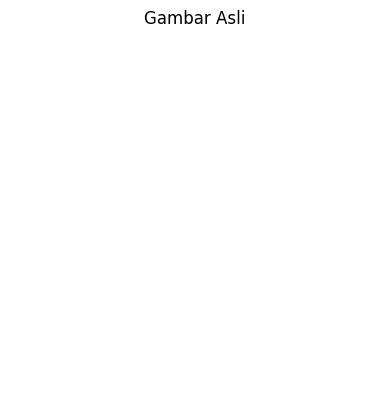

Nilai RGB dari gambar sebelum LSB:
Koordinat: (0, 0) - R: 255, G: 255, B: 255
Koordinat: (0, 1) - R: 255, G: 255, B: 255
Koordinat: (0, 2) - R: 255, G: 255, B: 255
Koordinat: (1, 0) - R: 255, G: 255, B: 255
Koordinat: (1, 1) - R: 255, G: 255, B: 255
Koordinat: (1, 2) - R: 255, G: 255, B: 255
Koordinat: (2, 0) - R: 255, G: 255, B: 255
Koordinat: (2, 1) - R: 255, G: 255, B: 255
Koordinat: (2, 2) - R: 255, G: 255, B: 255
Bit yang dibaca dari gambar sebelum LSB (LSB dari tiap channel):
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Gambar setelah LSB (dengan pesan):


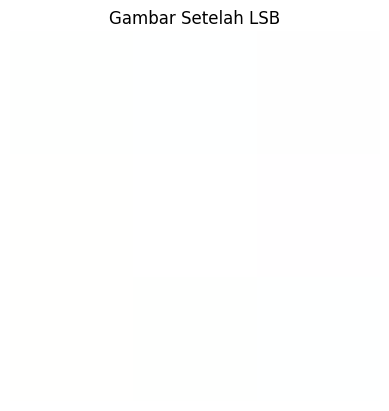

Nilai RGB dari gambar setelah LSB:
Koordinat: (0, 0) - R: 254, G: 255, B: 254
Koordinat: (0, 1) - R: 254, G: 255, B: 255
Koordinat: (0, 2) - R: 254, G: 254, B: 254
Koordinat: (1, 0) - R: 255, G: 255, B: 254
Koordinat: (1, 1) - R: 255, G: 255, B: 255
Koordinat: (1, 2) - R: 255, G: 254, B: 255
Koordinat: (2, 0) - R: 255, G: 255, B: 254
Koordinat: (2, 1) - R: 254, G: 255, B: 254
Koordinat: (2, 2) - R: 254, G: 255, B: 255
Bit yang dibaca dari gambar setelah LSB (LSB dari tiap channel):
[0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1]
Pesan yang diekstrak dari gambar: Lor


In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk mengubah pesan ke dalam bentuk bit
def message_to_bits(message):
    bits = ''.join([format(ord(char), '08b') for char in message])
    return bits

# Fungsi untuk menyisipkan pesan ke dalam gambar (LSB)
def embed_message(image, message):
    # Konversi pesan ke dalam bit
    message_bits = message_to_bits(message)
    message_bits += '11111111'  # Penanda akhir pesan (delimiter)

    img_data = np.array(image)
    h, w, _ = img_data.shape

    bit_idx = 0
    total_bits = len(message_bits)

    for i in range(h):
        for j in range(w):
            pixel = img_data[i, j]
            for k in range(3):  # Mengiterasi RGB
                if bit_idx < total_bits:
                    # Ganti bit LSB dari nilai channel dengan bit pesan
                    pixel[k] = (pixel[k] & ~1) | int(message_bits[bit_idx])
                    bit_idx += 1
            img_data[i, j] = pixel
            if bit_idx >= total_bits:
                break
        if bit_idx >= total_bits:
            break

    return Image.fromarray(img_data)

# Fungsi untuk mengekstrak pesan dari gambar
def extract_message(image):
    img_data = np.array(image)
    bits = []

    for i in range(img_data.shape[0]):
        for j in range(img_data.shape[1]):
            pixel = img_data[i, j]
            for k in range(3):  # Iterasi RGB
                bits.append(str(pixel[k] & 1))  # Ekstrak LSB dari setiap channel RGB

    # Gabungkan bit menjadi string
    bits = ''.join(bits)

    # Ambil setiap 8 bit (1 byte) dan konversikan ke karakter
    message = ''
    for i in range(0, len(bits), 8):
        byte = bits[i:i+8]
        char = chr(int(byte, 2))
        if char == chr(255):  # Penanda akhir pesan
            break
        message += char

    return message

# Fungsi untuk membaca bit dari gambar
def read_bits_from_image(image):
    img_data = np.array(image)
    bits = []

    # Iterasi setiap piksel dalam gambar
    for i in range(img_data.shape[0]):
        for j in range(img_data.shape[1]):
            pixel = img_data[i, j]
            for k in range(3):  # Iterasi untuk R, G, B
                # Ambil bit LSB dari masing-masing channel (R, G, B)
                bits.append(pixel[k] & 1)  # Ambil bit paling signifikan (LSB)

    return bits

# Fungsi untuk membaca nilai RGB dari setiap piksel gambar
def read_rgb_from_image(image):
    img_data = np.array(image)
    rgb_values = []

    # Iterasi setiap piksel dalam gambar
    for i in range(img_data.shape[0]):
        for j in range(img_data.shape[1]):
            pixel = img_data[i, j]
            rgb_values.append((i, j, pixel[0], pixel[1], pixel[2]))  # Simpan (x, y, R, G, B)

    return rgb_values

# Fungsi untuk menampilkan gambar
def display_image(image, title="Gambar"):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')  # Hilangkan sumbu
    plt.show()

# Contoh penggunaan
# Buat gambar 3x3 dengan warna putih
image = Image.new('RGB', (3, 3), color=(255, 255, 255))

# Tampilkan gambar asli
print("Gambar asli:")
display_image(image, "Gambar Asli")

# Baca nilai RGB dari setiap piksel sebelum LSB
rgb_values_before = read_rgb_from_image(image)
print("Nilai RGB dari gambar sebelum LSB:")
for rgb in rgb_values_before:
    print(f"Koordinat: ({rgb[0]}, {rgb[1]}) - R: {rgb[2]}, G: {rgb[3]}, B: {rgb[4]}")

# Baca bit LSB dari gambar sebelum pesan disisipkan
bits_before = read_bits_from_image(image)
print("Bit yang dibaca dari gambar sebelum LSB (LSB dari tiap channel):")
print(bits_before)

# Pesan yang akan disisipkan
message = "Lorem"

# Sisipkan pesan ke dalam gambar menggunakan LSB
encoded_image = embed_message(image, message)

# Tampilkan gambar yang telah disisipi pesan
print("Gambar setelah LSB (dengan pesan):")
display_image(encoded_image, "Gambar Setelah LSB")

# Baca nilai RGB dari setiap piksel setelah LSB
rgb_values_after = read_rgb_from_image(encoded_image)
print("Nilai RGB dari gambar setelah LSB:")
for rgb in rgb_values_after:
    print(f"Koordinat: ({rgb[0]}, {rgb[1]}) - R: {rgb[2]}, G: {rgb[3]}, B: {rgb[4]}")

# Baca bit LSB dari gambar yang telah disisipi pesan
bits_after = read_bits_from_image(encoded_image)
print("Bit yang dibaca dari gambar setelah LSB (LSB dari tiap channel):")
print(bits_after)

# Ekstrak pesan dari gambar yang telah disisipi pesan
extracted_message = extract_message(encoded_image)
print("Pesan yang diekstrak dari gambar:", extracted_message)

In [4]:
len(bits_before)

27

In [2]:
def string_to_bits(s):
    # Mengonversi setiap karakter dalam string menjadi representasi biner 8-bit
    bits = ''.join(format(ord(c), '08b') for c in s)
    return bits

# Contoh penggunaan
string = "Hi"
bit_string = string_to_bits(string)
print("String asli:", string)
print("Representasi bit:", bit_string)

String asli: Hi
Representasi bit: 0100100001101001


In [3]:
import numpy as np
from PIL import Image

# Fungsi untuk menghitung MSE (Mean Squared Error) antara dua gambar
def mse(imageA, imageB):
    # Konversi gambar ke numpy array
    img1 = np.array(imageA)
    img2 = np.array(imageB)

    # Hitung perbedaan antara dua gambar
    err = np.sum((img1.astype("float") - img2.astype("float")) ** 2)

    # Normalisasi perbedaan terhadap jumlah piksel
    err /= float(img1.shape[0] * img1.shape[1] * img1.shape[2])

    return err

# Fungsi untuk menghitung PSNR (Peak Signal-to-Noise Ratio)
def psnr(imageA, imageB):
    mse_value = mse(imageA, imageB)
    if mse_value == 0:
        return float('inf')  # Jika MSE nol, maka gambar identik, dan PSNR adalah tak terhingga
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

# Contoh penggunaan
# Misalkan kita memiliki dua gambar: image dan encoded_image
# Gambar asli dan gambar setelah disisipi pesan

# Hitung PSNR antara gambar asli dan gambar hasil LSB
psnr_value = psnr(image, encoded_image)
print(f"PSNR antara gambar asli dan encoded_image: {psnr_value} dB")

PSNR antara gambar asli dan encoded_image: 52.44444125026898 dB
